<img src="https://bit.ly/2VnXWr2" width="80">

Ironhack Data Analytics Bootcamp

<BR>

Project 1 – **Shark Attacks**, data cleaning and manipulation with Pandas
<br>
[Felipe Altermann](https://www.linkedin.com/in/felipealtermann/)
<br>
August 2021
<br>
<br>

**Business question to answer:**

# Where in Australia to build a **shark-free** family resort?


Case Study:
<br>
**Shark-free Hotels & Resorts** is a '*worldwide to be*' hotel chain since it's missing a branch in Australia.
- to date, all of it's other houses are build in "safe" beaches – with no sight of sharks
- main *clientèle* – all kind of families, **with** and without kids

# Global Shark Attacks Dataset: a first look

*General note: all datasets source used for this analysis are listed in the footnotes.*
<br>

In [1]:
# Setting up environment – loading packages

import geopy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import re
import seaborn as sns
from geopy.geocoders import Nominatim
from IPython.display import display_html

In [2]:
# collecting data
# csv file first look to check used separator and character encoding

pd.read_csv("./assets/attacks.csv", nrows=2)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303,NaN,NaN
1,2018.06.18,18-Jun-2018,2018,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson�McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302,NaN,NaN


In [3]:
# need for a special encoding to correctly read the original csv

original_shark_df = pd.read_csv("./assets/attacks.csv", encoding="latin1")
pd.set_option("max_colwidth", 60)

In [4]:
original_shark_df.shape

(25723, 24)

In [5]:
original_shark_df.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [6]:
original_shark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [7]:
original_shark_df.isnull().sum().sort_values(ascending=False)

Unnamed: 22               25722
Unnamed: 23               25721
Time                      22775
Species                   22259
Age                       22252
Sex                       19986
Activity                  19965
Location                  19961
Fatal (Y/N)               19960
Area                      19876
Name                      19631
Country                   19471
Injury                    19449
Investigator or Source    19438
Type                      19425
Year                      19423
href formula              19422
Date                      19421
pdf                       19421
href                      19421
Case Number.1             19421
Case Number.2             19421
original order            19414
Case Number               17021
dtype: int64

In [8]:
# source csv file contains almost 3/4 of empty rows

original_shark_df[original_shark_df.duplicated(keep=False)].head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6310,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6311,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6312,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6313,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# drop empty rows

original_shark_df.drop_duplicates(inplace=True)

In [10]:
original_shark_df.shape

(6312, 24)

In [11]:
original_shark_df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [12]:
original_shark_df.columns = original_shark_df.columns.str.lower()

In [13]:
original_shark_df.columns

Index(['case number', 'date', 'year', 'type', 'country', 'area', 'location',
       'activity', 'name', 'sex ', 'age', 'injury', 'fatal (y/n)', 'time',
       'species ', 'investigator or source', 'pdf', 'href formula', 'href',
       'case number.1', 'case number.2', 'original order', 'unnamed: 22',
       'unnamed: 23'],
      dtype='object')

In [14]:
# keeping usefull columns only

shark_df = (
    original_shark_df[
        [
            "case number",
            "type",
            "country",
            "area",
            "location",
            "sex ",
            "age",
            "fatal (y/n)",
            "href formula",
        ]
    ]
    .copy()
    .reset_index()
)

In [15]:
shark_df.head(2)

,index,case number,type,country,area,location,sex,age,fatal (y/n),href formula
0,0,2018.06.25,Boating,USA,California,"Oceanside, San Diego County",F,57,N,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
1,1,2018.06.18,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",F,11,N,http://sharkattackfile.net/spreadsheets/pdf_directory/20...


In [16]:
shark_df["case number"] = shark_df["case number"].astype(str)

In [17]:
shark_df["year"] = shark_df["case number"].str[0:4]
shark_df["month"] = shark_df["case number"].str[5:7]
shark_df.drop(["case number"], axis=1, inplace=True)

In [18]:
# rename important columns

shark_df = shark_df.rename(
    columns={"sex ": "sex", "fatal (y/n)": "fatal", "href formula": "link"}
)

In [19]:
shark_df.head(2)

,index,type,country,area,location,sex,age,fatal,link,year,month
0,0,Boating,USA,California,"Oceanside, San Diego County",F,57,N,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,2018,06
1,1,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",F,11,N,http://sharkattackfile.net/spreadsheets/pdf_directory/20...,2018,06


In [20]:
# reorder columns

shark_df = shark_df[
    [
        "year",
        "month",
        "type",
        "country",
        "area",
        "location",
        "sex",
        "age",
        "fatal",
        "link",
    ]
]

In [21]:
shark_df.head(2)

,year,month,type,country,area,location,sex,age,fatal,link
0,2018,06,Boating,USA,California,"Oceanside, San Diego County",F,57,N,http://sharkattackfile.net/spreadsheets/pdf_directory/20...
1,2018,06,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",F,11,N,http://sharkattackfile.net/spreadsheets/pdf_directory/20...


In [22]:
shark_df.isnull().sum().sort_values(ascending=False)

age         2841
sex          575
location     550
fatal        549
area         465
country       60
type          14
link          11
year           0
month          0
dtype: int64

# Cleaning important columns – Worldwide analysis

In [23]:
shark_df.columns

Index(['year', 'month', 'type', 'country', 'area', 'location', 'sex', 'age',
       'fatal', 'link'],
      dtype='object')

## Column *'country'*

In [24]:
def try_str(value):
    """Transform column values to string."""

    try:
        return str(value)
    except:
        return np.nan

In [25]:
shark_df["country"] = shark_df["country"].map(try_str)

In [26]:
shark_df["country"] = shark_df["country"].str.lower()
shark_df["country"] = shark_df["country"].str.strip()
shark_df["country"].fillna("unknown", inplace=True)

In [27]:
# worldwide number of shark attacks by country

shark_country_ww = pd.DataFrame(
    shark_df["country"].value_counts(ascending=False).head(202).reset_index()
)
shark_country_ww = shark_country_ww.rename(
    columns={"index": "country", "country": "total_attacks"}
)
shark_country_ww

,country,total_attacks
0,usa,2229
1,australia,1338
2,south africa,579
3,papua new guinea,134
4,new zealand,128
...,...,...
197,red sea?,1
198,south china sea,1
199,netherlands antilles,1
200,aruba,1


In [28]:
# top 10 countries shows a clear top position for australia

shark_country_top_10 = shark_country_ww.loc[0:9, :]
shark_country_top_10

,country,total_attacks
0,usa,2229
1,australia,1338
2,south africa,579
3,papua new guinea,134
4,new zealand,128
5,brazil,112
6,bahamas,109
7,mexico,90
8,italy,71
9,fiji,65


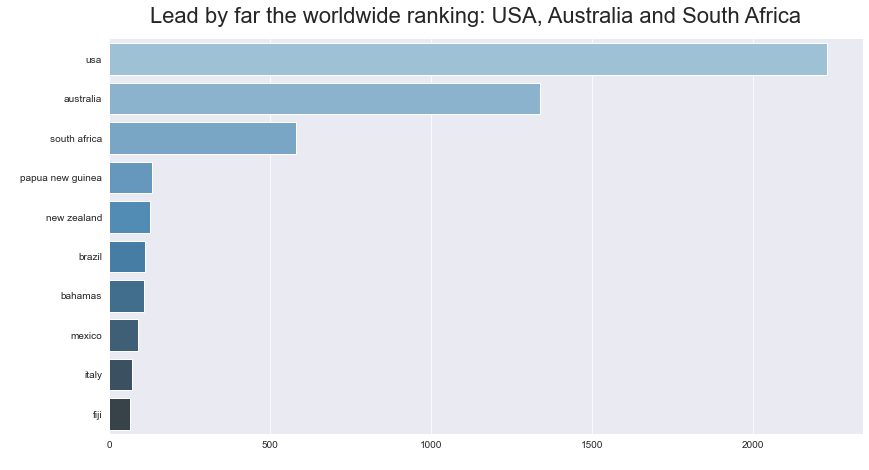

In [29]:
sns.set_style("darkgrid")
g = sns.catplot(
    x="total_attacks",
    y="country",
    data=shark_country_top_10,
    kind="bar",
    height=6,
    aspect=2,
    palette="Blues_d",
)
g.set(xlabel=" ", ylabel=" ")
g.fig.suptitle(
    "Lead by far the worldwide ranking: USA, Australia and South Africa",
    x=0.54,
    y=1.05,
    fontsize=22,
)
plt.show()

In [30]:
shark_country_top_3 = shark_country_ww.loc[0:2, :].reset_index()
shark_country_top_3["relation_to_mean"] = pd.qcut(
    shark_country_top_3.total_attacks, 2, ["below", "above"]
)

In [31]:
shark_country_top_3

,index,country,total_attacks,relation_to_mean
0,0,usa,2229,above
1,1,australia,1338,below
2,2,south africa,579,below


In [32]:
print("")
print(
    f"\033[0;43m Australia shark attacks (= {shark_country_top_3.total_attacks[1]}) is almost equal to the mean (= {int(shark_country_top_3.total_attacks.mean())}) of the top 3 countries. "
)
print("")


 Australia shark attacks (= 1338) is almost equal to the mean (= 1382) of the top 3 countries. 



## Column *'sex'*

- creating a **new legend**:
    - m = Male
    - f = Female
    - N/A = Missing

In [33]:
dict(shark_df["sex"].value_counts(ascending=False))

{'M': 5094, 'F': 637, 'M ': 2, 'N': 2, '.': 1, 'lli': 1}

In [34]:
shark_df["sex"] = shark_df["sex"].str.lower()
shark_df["sex"].fillna("Missing", inplace=True)
shark_df.replace(
    {"sex": {"m ": "Male", "n": "Male", ".": "Missing", "lli": "Missing"}}, inplace=True
)
shark_df.replace({"sex": {"m": "Male", "f": "Female"}}, inplace=True)

In [35]:
def try_int(value):
    """Transform column values to integer."""

    try:
        return int(value)
    except:
        return np.nan

In [36]:
shark_sex_ww = pd.DataFrame(shark_df["sex"].value_counts(ascending=False).reset_index())
shark_sex_ww = shark_sex_ww.rename(columns={"index": "sex", "sex": "total"})
shark_sex_ww

,sex,total
0,Male,5098
1,Female,637
2,Missing,577


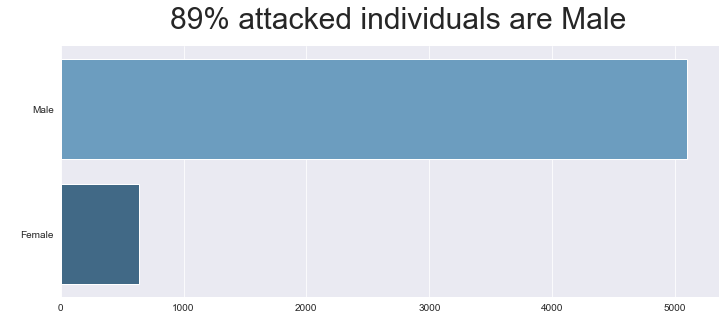

In [37]:
shark_sex_ww_m_f = shark_sex_ww.loc[0:1, :]

sns.set_style("darkgrid")
g = sns.catplot(
    x="total",
    y="sex",
    data=shark_sex_ww_m_f,
    kind="bar",
    height=4,
    aspect=2.5,
    palette="Blues_d",
    orient="h",
)
g.set(xlabel=" ", ylabel=" ")
g.fig.suptitle("89% attacked individuals are Male", x=0.54, y=1.10, fontsize=30)
plt.show()

## Column *'fatal'*

- creating a **new legend**:
    - n = No
    - y = Yes
    - N/A = Missing

In [38]:
dict(shark_df["fatal"].value_counts(ascending=False))

{'N': 4293,
 'Y': 1388,
 'UNKNOWN': 71,
 ' N': 7,
 '2017': 1,
 'y': 1,
 'M': 1,
 'N ': 1}

In [39]:
shark_df["fatal"] = shark_df["fatal"].str.lower()
shark_df["fatal"].fillna("Missing", inplace=True)
shark_df.replace(
    {
        "fatal": {
            " n": "No",
            "n ": "No",
            "m": "No",
            "2017": "Missing",
            "unknown": "Missing",
        }
    },
    inplace=True,
)
shark_df.replace({"fatal": {"n": "No", "y": "Yes"}}, inplace=True)

In [40]:
shark_fatal_ww = pd.DataFrame(
    shark_df["fatal"].value_counts(ascending=False).reset_index()
)
shark_fatal_ww = shark_fatal_ww.rename(columns={"index": "is_fatal", "fatal": "total"})
shark_fatal_ww

,is_fatal,total
0,No,4302
1,Yes,1389
2,Missing,621


In [41]:
sex_list = ["Female", "Male"]
dead_list = pd.Series(
    data=[
        len(shark_df[(shark_df.sex == "Female") & (shark_df.fatal == "Yes")]),
        len(shark_df[(shark_df.sex == "Male") & (shark_df.fatal == "Yes")]),
    ],
    index=sex_list,
)
survival_list = pd.Series(
    data=[
        len(shark_df[(shark_df.sex == "Female") & (shark_df.fatal == "No")]),
        len(shark_df[(shark_df.sex == "Male") & (shark_df.fatal == "No")]),
    ],
    index=sex_list,
)
shark_fatal_ww_1 = pd.DataFrame({"died": dead_list, "survived": survival_list})
shark_fatal_ww_1["dead_ratio"] = round(
    (shark_fatal_ww_1.died / shark_fatal_ww_1.died.sum()) * 100, 2
)
shark_fatal_ww_1["survival_ratio"] = round(
    (shark_fatal_ww_1.survived / shark_fatal_ww_1.survived.sum()) * 100, 2
)
shark_fatal_ww_1.sort_index(axis=1)

,dead_ratio,died,survival_ratio,survived
Female,8.35,107,11.84,468
Male,91.65,1174,88.16,3484
